Calibrate MPU and output adjusted log.

In [58]:
import matplotlib.pylab as pylab
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pylab.rcParams['figure.figsize'] = 12, 12

def from_space_separated(file):
    log = []
    with open(file, 'r', encoding='latin-1') as f:
        for line in f:
            parts = line.split(' ')
            try:
                # ax,ay,az,gx,gy,gz,dt_s,y,p,r
                ax = parts[0]
                ay = parts[1]
                az = parts[2]
                gx = parts[3]
                gy = parts[4]
                gz = parts[5]
                dt = parts[6]
                y = parts[7]
                p = parts[8]
                r = parts[9]
                log.append(np.array([ax, ay, az, gx, gy, gz, y, p, r, dt]).astype(np.float))
            except Exception as e:
                print('lol, err: {}'.format(e))
    return np.array(log)

log = from_space_separated('calibration_and_pose.txt')
log_time = np.cumsum(log[:, 9])

Use first six seconds to estimate gyro biases and noise levels.

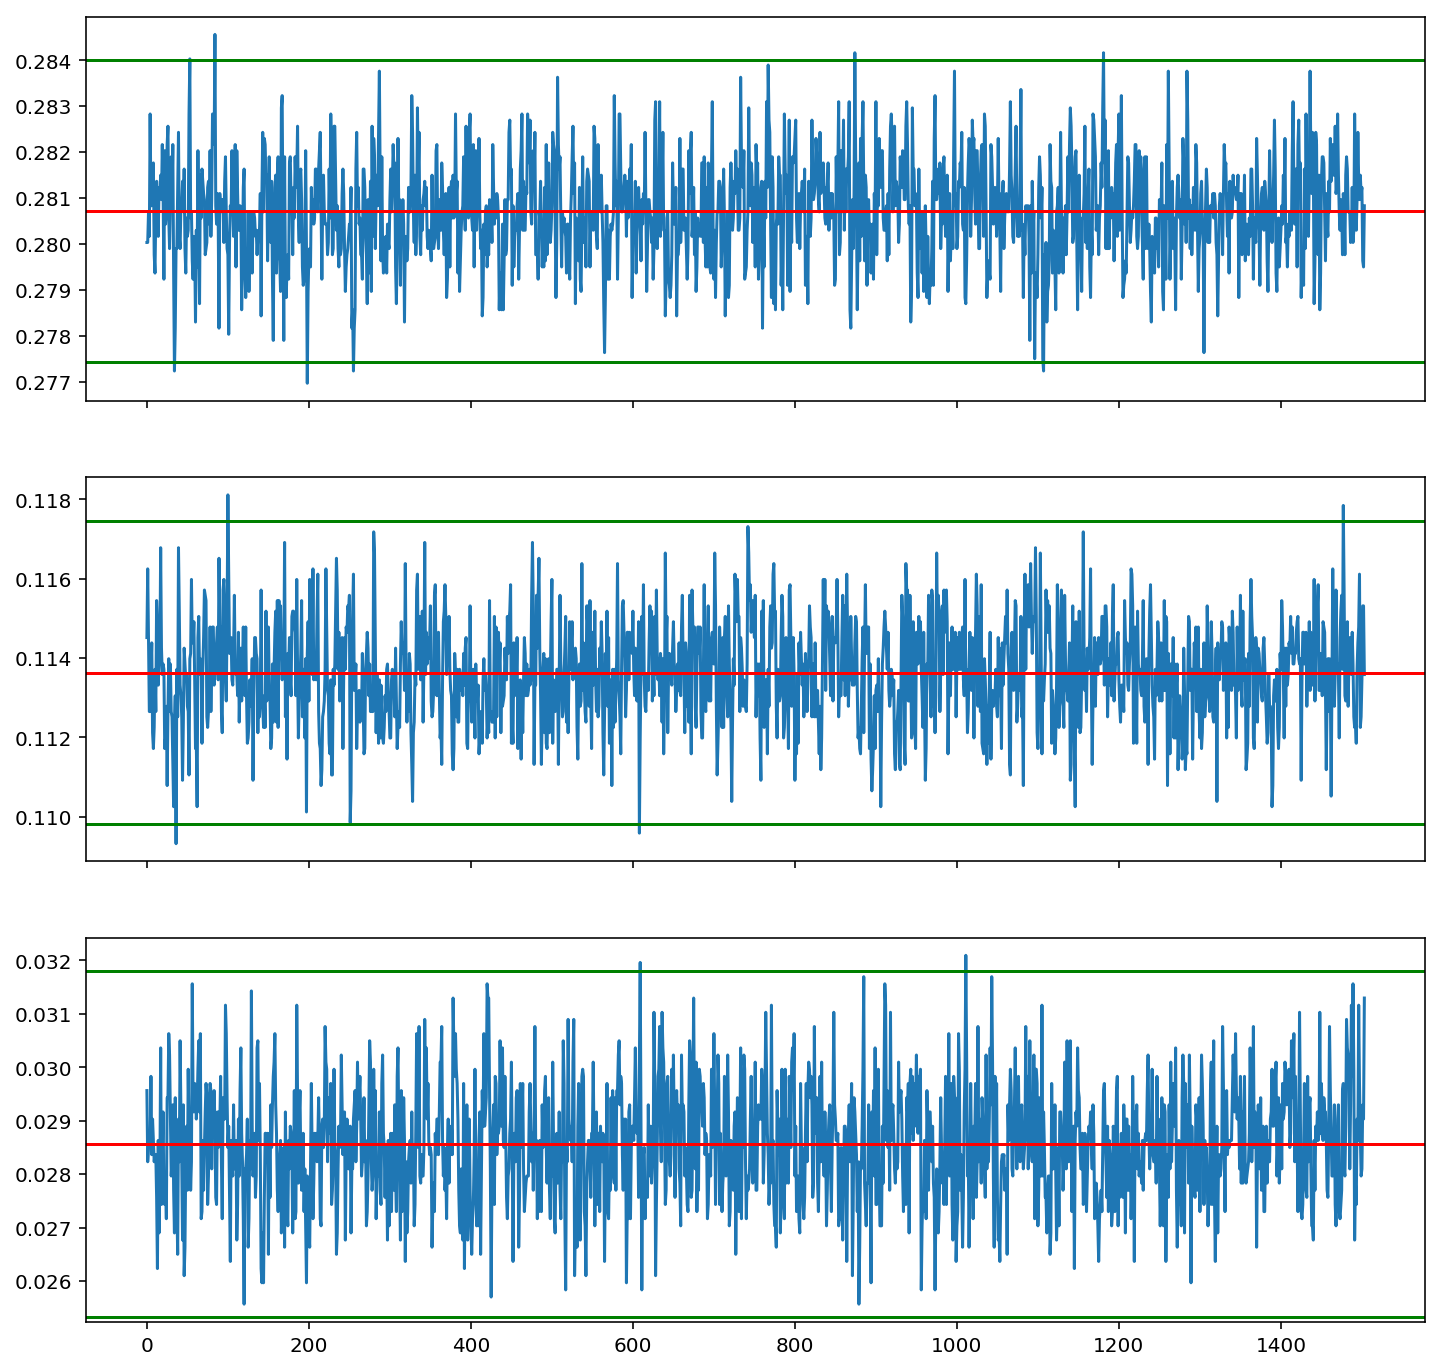

In [72]:
def plot_multi(log, cols):
    f, axarr = plt.subplots(len(cols), sharex=True)
    for i, c in enumerate(cols):
        axarr[i].plot(log[:, c])
    return f, axarr

noise_log = log[log_time < 6, :]
_, axarr = plot_multi(noise_log, [3, 4, 5])

stdevs = []
means = []
for i, c in enumerate([3, 4, 5]):
    std = np.std(noise_log[:, c])
    mean = np.mean(noise_log[:, c])
    axarr[i].axhline(mean, c = 'red')
    axarr[i].axhline(mean + 3 * std, c = 'green')
    axarr[i].axhline(mean - 3 * std, c = 'green')
    stdevs.append(std)
    means.append(mean)